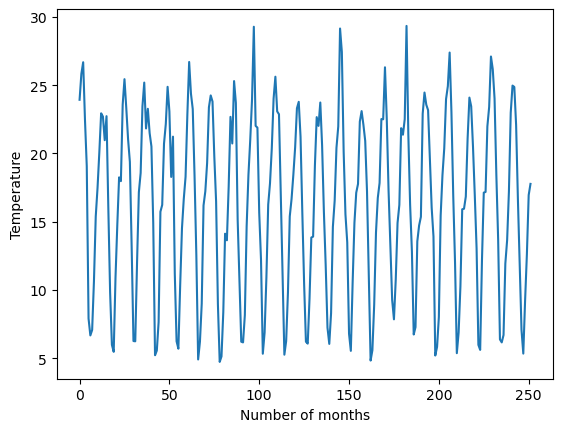

In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

df = pd.read_csv('Rainfall_data.csv')
df.head
plt.xlabel('Number of months')
plt.ylabel('Temperature')
plt.plot(df['Temperature'])

In [37]:
res = adfuller(df['Temperature'])

labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
for value,label in zip(res,labels):
    print(label+' : '+str(value) )
    if res[1] <= 0.05:
        print("Data  is stationary")
    else:
        print("Data is non-stationary ")

ADF Test Statistic : -4.4691883338891625
Data  is stationary
p-value : 0.00022344504386941915
Data  is stationary
#Lags Used : 15
Data  is stationary
Number of Observations Used : 236
Data  is stationary


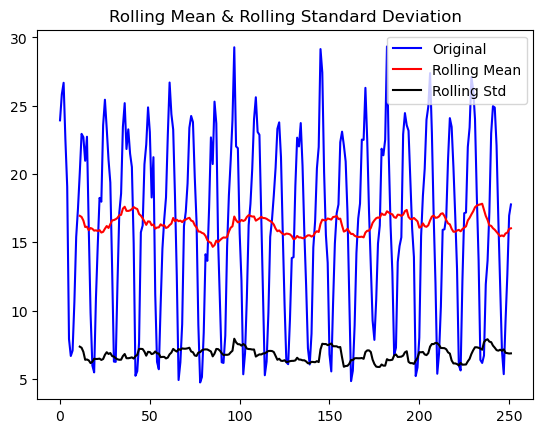

In [38]:
rolling_mean = df['Temperature'].rolling(window = 12).mean()
rolling_std = df['Temperature'].rolling(window = 12).std()
plt.plot(df['Temperature'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [39]:
result = adfuller(df['Temperature'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.4691883338891625
p-value: 0.00022344504386941915
Critical Values:
	1%: -3.4583663275730476
	5%: -2.8738660999177132
	10%: -2.5733390785693766


[ 1.    0.81  0.43 -0.03 -0.45 -0.74 -0.84 -0.73 -0.44 -0.03  0.4   0.75
  0.89  0.75  0.4  -0.03 -0.43 -0.7  -0.8  -0.71 -0.43 -0.05  0.36  0.7
  0.84  0.72  0.39 -0.02 -0.39 -0.66 -0.76 -0.67 -0.4  -0.04  0.36  0.67
  0.81  0.69  0.38 -0.   -0.37]


C:\Users\91984\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\91984\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


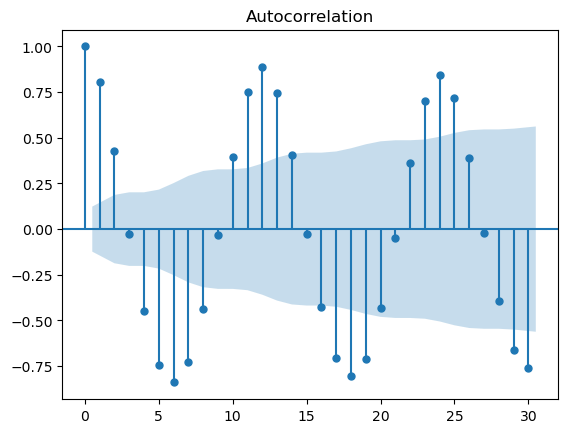

In [40]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_values = acf(df['Temperature'])
print(np.round(acf_values,2))
plot_acf(df['Temperature'], lags=30);

[ 1.    0.81  0.43 -0.03 -0.45 -0.74 -0.84 -0.73 -0.44 -0.03  0.4   0.75
  0.89  0.75  0.4  -0.03 -0.43 -0.7  -0.8  -0.71 -0.43 -0.05  0.36  0.7
  0.84  0.72  0.39 -0.02 -0.39 -0.66 -0.76 -0.67 -0.4  -0.04  0.36  0.67
  0.81  0.69  0.38 -0.   -0.37]


C:\Users\91984\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


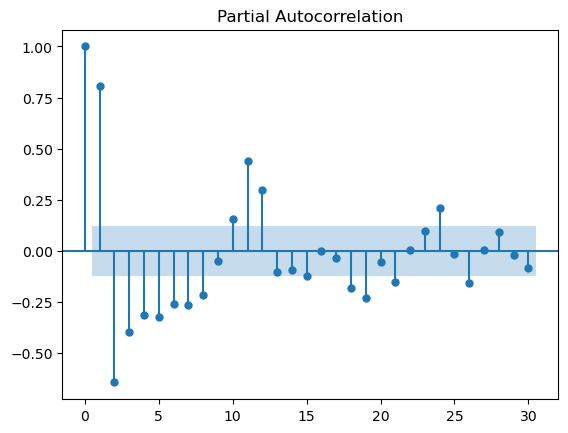

In [41]:
pacf_values = pacf(df['Temperature'])
print(np.round(acf_values,2))
plot_pacf(df['Temperature'], lags=30);

C:\Users\91984\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


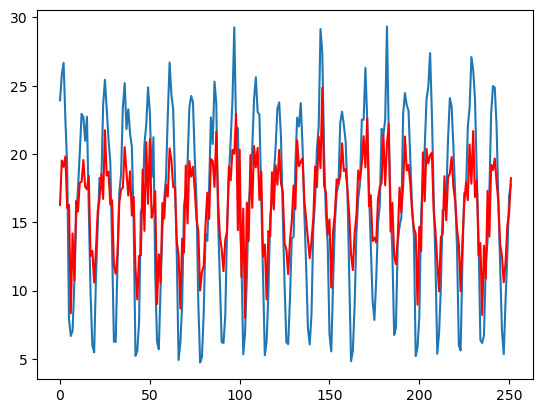

In [42]:

model = ARIMA(df['Temperature'], order=(1,0,2))
results = model.fit(disp=-1)
plt.plot(df['Temperature'])
plt.plot(results.fittedvalues, color='red')

C:\Users\91984\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


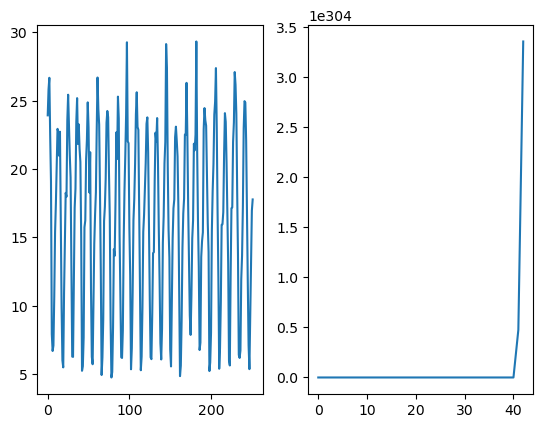

In [43]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARIMA = pd.Series(df['Temperature'], index=df.index)

predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff_cumsum, fill_value=0)

predictions_ARIMA = np.exp(predictions_ARIMA)
plt.subplot(1,2,1)
plt.plot(df['Temperature'])
plt.subplot(1,2,2)
plt.plot(predictions_ARIMA)

(200.0, 300.0)

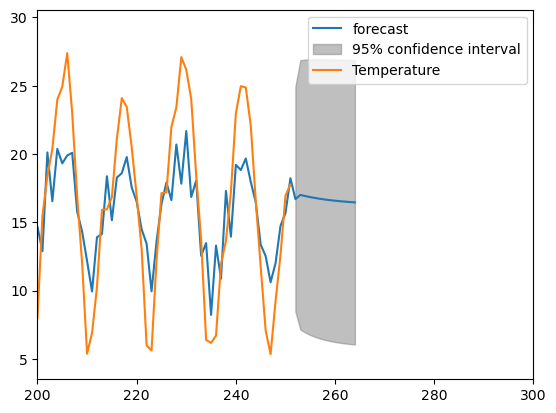

In [44]:
results.plot_predict(1,264)
plt.xlim(200,300)